In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime


In [120]:
#Describe Dataset here
filename = 'data\zillow\MortgageRateConventionalFixed.csv'
mortgage_rates_src = pd.read_csv(filename)

#Describe Dataset here
filename = 'data\zillow\Affordability_Wide_2019Q2_Public.csv'
affordability_index_src = pd.read_csv(filename,encoding='latin-1')

#Describe Dataset here
filename = 'data\zillow\Affordability_Income_2018Q4.csv'
affordability_income_src = pd.read_csv(filename,encoding='latin-1')

#Median Rental Price - Single Family Residence
filename = 'data\zillow\City_MedianRentalPrice_Sfr.csv'
median_rental_price_sfr_src = pd.read_csv(filename)

#Median Rental Price Per Square Foot - Single Family Residence
filename = 'data\zillow\City_MedianRentalPricePerSqft_Sfr.csv'
median_rental_price_sft_sqft_src = pd.read_csv(filename)

#Median Rental Price - Multi-Family Residence
filename = 'data\zillow\City_MedianRentalPrice_Mfr5Plus.csv'
median_rental_price_mfr_src = pd.read_csv(filename)

#Median Rental Price Per Square Foot - Multi-Family Residence
filename = 'data\zillow\City_MedianRentalPricePerSqft_Mfr5Plus.csv'
median_rental_price_mfr_sqft_src = pd.read_csv(filename)

#Rental Index Per Square Foot - All Homes
filename = 'data\zillow\City_ZriPerSqft_AllHomes.csv'
rental_index_all_sqft_src = pd.read_csv(filename,encoding='latin-1')


In [128]:
mortgage_rates_src.describe()

,MortgageRateConventionalFixed
count,91680.000000
mean,3.953478
std,0.358861
min,3.230000
25%,3.690000
50%,3.900000
75%,4.200000
max,5.000000


In [122]:
mortgage_rates_monthly = mortgage_rates_src
mortgage_rates_monthly = mortgage_rates_monthly.drop(columns='TimePeriod')
mortgage_rates_monthly = mortgage_rates_monthly.rename(columns={'MortgageRateConventionalFixed':'Rate'})
mortgage_rates_monthly['Date'] = pd.to_datetime(mortgage_rates_monthly['Date'], format='%Y-%m-%d')
mortgage_rates_monthly['Year'] = pd.DatetimeIndex(mortgage_rates_monthly['Date']).year
mortgage_rates_monthly['Month'] = pd.DatetimeIndex(mortgage_rates_monthly['Date']).month
mortgage_rates_monthly = mortgage_rates_monthly.drop(columns='Date')
mortgage_rates_monthly = mortgage_rates_monthly[['Year','Month','Rate']]
mortgage_rates_monthly = mortgage_rates_monthly.groupby(['Year','Month']).median()
#mortgage_rates_monthly = mortgage_rates_monthly.set_index('Date').dropna(how='any')
#mortgage_rates_monthly = mortgage_rates_monthly.groupby(pd.Grouper(freq='M')).median().reset_index()  # update for v0.21+
mortgage_rates_monthly.head()

Rate
Year Month      
2011 6      4.36
     7      4.45
     8      4.12
     9      3.97
     10     4.06

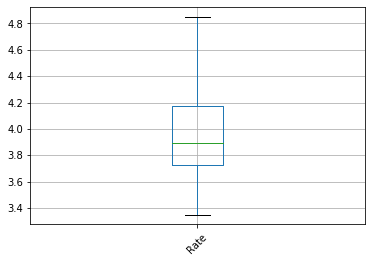

In [134]:
#Let's thorw up a quick plot to see change over time by Size / period
mortgage_rates_monthly.plot.box(rot=45, grid=True)
plt.show()

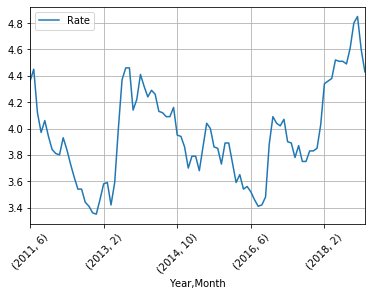

In [123]:
#Let's thorw up a quick plot to see change over time by Size / period
mortgage_rates_monthly.plot(rot=45, grid=True)
plt.legend(loc='best')
plt.show()

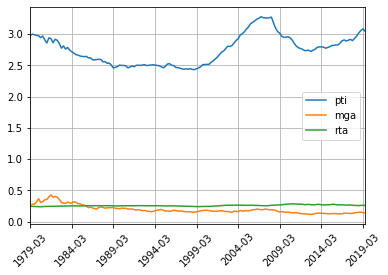

,RegionName,Index,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,...,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03,2019-06,State,City
0,United States,Price To Income,2.903590,2.939427,2.942101,2.946123,2.934565,2.930422,2.964477,2.917089,...,3.371671,3.383362,3.433804,3.473954,3.515177,3.568544,3.583441,3.562165,,United States
1,"New York, NY",Price To Income,2.928344,2.956635,2.966927,2.961860,3.007144,2.996565,3.060809,2.980520,...,5.405203,5.418615,5.467140,5.484124,5.495752,5.540017,5.559801,5.505950,NY,New York
2,"Los Angeles-Long Beach-Anaheim, CA",Price To Income,4.019673,4.141217,4.208146,4.278269,4.308551,4.384455,4.429802,4.435118,...,8.705759,8.797724,8.917271,8.912011,8.909573,8.929002,8.839738,8.744949,CA,Los Angeles-Long Beach-Anaheim
3,"Chicago, IL",Price To Income,3.035758,3.045651,2.984501,2.973171,2.895068,2.912028,2.774334,2.794168,...,3.074042,3.091003,3.128954,3.132292,3.129938,3.145848,3.155977,3.113370,IL,Chicago
4,"Dallas-Fort Worth, TX",Price To Income,3.887457,4.025835,4.101038,4.130605,4.135414,4.082676,4.122516,4.133618,...,3.110652,3.152714,3.262052,3.318315,3.358206,3.437634,3.475066,3.430203,TX,Dallas-Fort Worth


In [180]:
affordability_index = affordability_index_src#.set_index('Index',append=True)
#affordability_index.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_index.columns],names=['Year','Month'])
#affordability_index['Date'] = pd.to_datetime(affordability_index['Date'], format='%Y-%m')
affordability_index['State'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_index['City'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
affordability_index = affordability_index.drop(columns=['RegionID','SizeRank','HistoricAverage_1985thru1999'])
#city = tmp.apply(lambda x: " ".join(x[0].split(',')[1:]))
#state = tmp.apply(lambda x: x[1].split(',')[0])
affordability_index['Index'].unique()
#affordability_index_pti = affordability_index.query("Index == 'Price To Income'")
#affordability_index_mga = affordability_index.query("Index == 'Mortgage Affordability'")
#affordability_index_rta = affordability_index.query("Index == 'Rent Affordability'")
affordability_index.head()


affordability_index.query("Index == 'Price To Income'").median().plot(rot=45, grid=True, label='pti')
affordability_index.query("Index == 'Mortgage Affordability'").median().plot(rot=45, grid=True, label='mga')
affordability_index.query("Index == 'Rent Affordability'").median().plot(rot=45, grid=True, label='rta')
#mortgage_rates_monthly.median().plot(rot=45, grid=True, label='mrt')
plt.legend(loc='best')
plt.show()

#affordability_index.query("Index == 'Rent Affordability'").head()
#affordability_index.query("Index == 'Mortgage Affordability'").head()
#affordability_index.query("Index == 'Rent Affordability'").head()
affordability_index.head()

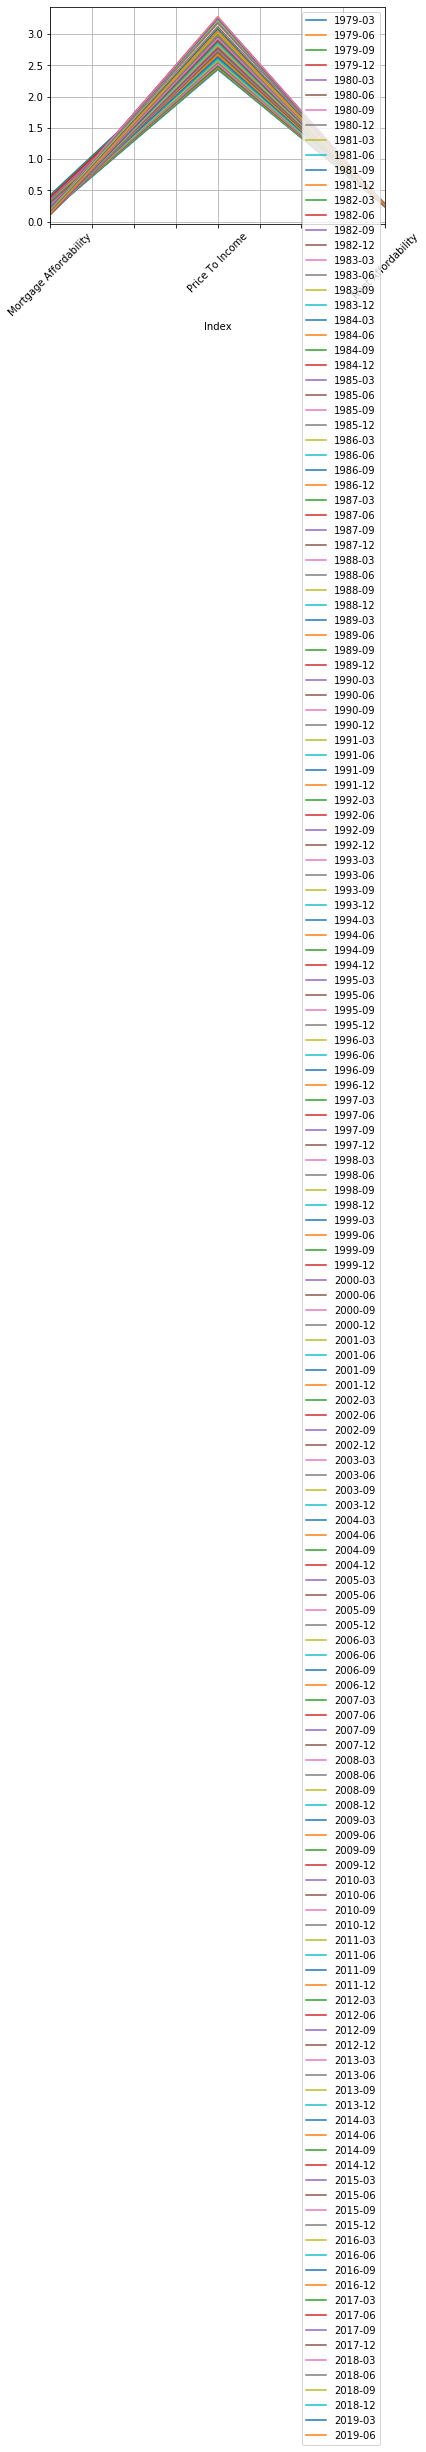

In [183]:
affordability_index.groupby('Index').median().plot(rot=45, grid=True)
plt.show()

In [161]:
affordability_income = affordability_income_src
affordability_income['State'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_income['City'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
affordability_income.head()

,RegionID,RegionName,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,State,City
0,102001,United States,0,16346.86,16675.92,17015.62,17325.61,17700.06,18003.37,18309.93,...,59165.91,59959.39,60741.39,61477.31,61936.623236,62395.936471,62855.249707,63314.562943,,United States
1,394913,"New York, NY",1,17536.34,17888.75,18255.17,18614.93,19075.72,19493.98,19894.97,...,73819.12,74936.31,75963.84,76753.93,77408.082812,78062.235625,78716.388438,79370.541250,NY,New York
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,17913.83,18285.02,18746.27,19213.79,19782.36,20306.08,20737.44,...,68525.74,69658.59,70516.54,71268.43,71844.905261,72421.380523,72997.855784,73574.331046,CA,Los Angeles-Long Beach-Anaheim
3,394463,"Chicago, IL",3,20056.35,20460.12,20910.06,21267.37,21678.20,21848.90,21984.03,...,67326.11,68089.22,68769.39,69427.31,69940.585833,70453.861665,70967.137498,71480.413331,IL,Chicago
4,394514,"Dallas-Fort Worth, TX",4,18147.33,18458.77,18899.16,19454.80,20069.21,20608.07,21021.31,...,66119.78,66969.37,67831.43,68607.56,69045.650070,69483.740139,69921.830209,70359.920279,TX,Dallas-Fort Worth


In [162]:
median_rental_price_sfr = median_rental_price_sfr_src
median_rental_price_sfr['State'] = median_rental_price_sfr["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_sfr['City'] = median_rental_price_sfr["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_sfr.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,City
0,New York,,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,NaN,NaN,...,2500.0,2500.0,2500.0,2500.0,2500.0,2550.0,2500.0,2500.0,2600.0,New York
1,Los Angeles,,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,NaN,...,3995.0,3949.0,3950.0,3875.0,3950.0,3995.0,3990.0,3900.0,4000.0,Los Angeles
2,Houston,,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,NaN,...,1550.0,1550.0,1550.0,1550.0,1595.0,1600.0,1600.0,1600.0,1600.0,Houston
3,Chicago,,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,1542.5,1500.0,1500.0,...,1550.0,1550.0,1595.0,1600.0,1600.0,1600.0,1605.0,1650.0,1600.0,Chicago
4,San Antonio,,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,1295.0,1300.0,1295.0,1300.0,1300.0,1332.5,1350.0,1350.0,1339.0,San Antonio


In [163]:
median_rental_price_sft_sqft = median_rental_price_sft_sqft_src
median_rental_price_sft_sqft['State'] = median_rental_price_sft_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_sft_sqft['City'] = median_rental_price_sft_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_sft_sqft.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,City
0,New York,,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,NaN,NaN,...,2.462653,2.399000,2.488433,2.510986,2.553778,2.594242,2.583333,2.500000,2.550000,New York
1,Los Angeles,,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,1.676921,1.728179,1.725829,...,2.624553,2.626128,2.673983,2.651515,2.690100,2.736318,2.771493,2.750924,2.760252,Los Angeles
2,Houston,,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,NaN,...,0.938375,0.938967,0.941667,0.949367,0.961538,0.975014,0.978820,0.974817,0.972868,Houston
3,Chicago,,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,NaN,...,1.636364,1.659387,1.814709,1.842634,1.795039,1.771255,1.785714,1.790000,1.782609,Chicago
4,San Antonio,,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,0.855915,0.862069,0.869247,0.877371,0.887311,0.886067,0.887507,0.888823,0.885246,San Antonio


In [164]:
median_rental_price_mfr = median_rental_price_mfr_src
median_rental_price_mfr['State'] = median_rental_price_mfr["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_mfr['City'] = median_rental_price_mfr["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_mfr.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,City
0,New York,,New York-Newark-Jersey City,Queens County,1,NaN,2200.0,2397.5,2500.0,2450.0,...,2475.0,2475.0,2499.0,2500.0,2575.0,2600.0,2650.0,2650.0,2650.0,New York
1,Los Angeles,,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,1762.5,1750.0,1945.0,2000.0,...,2550.0,2565.0,2550.0,2550.0,2595.0,2561.0,2585.0,2580.0,2595.0,Los Angeles
2,Houston,,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,NaN,...,1385.0,1367.0,1372.0,1385.0,1380.0,1375.0,1379.0,1369.0,1368.0,Houston
3,Chicago,,Chicago-Naperville-Elgin,Cook County,4,1645.0,1350.0,1315.0,1325.0,1307.5,...,1700.0,1745.0,1750.0,1795.0,1795.0,1795.0,1795.0,1750.0,1725.0,Chicago
4,San Antonio,,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,1141.0,1166.0,1177.0,1175.0,1179.0,1198.0,1210.0,1203.0,1186.0,San Antonio


In [165]:
median_rental_price_mfr_sqft = median_rental_price_mfr_sqft_src
median_rental_price_mfr_sqft['State'] = median_rental_price_mfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_mfr_sqft['City'] = median_rental_price_mfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_mfr_sqft.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,City
0,New York,,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,NaN,NaN,...,3.055556,3.055556,3.080000,3.125000,3.312500,3.333333,3.466667,3.487982,3.375000,New York
1,Los Angeles,,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,1.529126,1.650546,1.651665,1.646133,...,3.149802,3.100000,3.094003,3.114658,3.159391,3.146154,3.181818,3.179843,3.201931,Los Angeles
2,Houston,,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,NaN,...,1.533333,1.517682,1.516520,1.526667,1.520193,1.515152,1.526718,1.524743,1.523207,Houston
3,Chicago,,Chicago-Naperville-Elgin,Cook County,4,NaN,1.392857,1.470588,1.417424,1.500317,...,2.162500,2.214286,2.316364,2.343157,2.268293,2.242857,2.262702,2.247407,2.250000,Chicago
4,San Antonio,,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,1.278092,1.279703,1.321175,1.320106,1.322815,1.338574,1.353028,1.352830,1.337331,San Antonio


In [166]:
rental_index_all_sqft = rental_index_all_sqft_src
rental_index_all_sqft['State'] = rental_index_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
rental_index_all_sqft['City'] = rental_index_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
rental_index_all_sqft.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,2011-02,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,City
0,6181,New York,,New York-Newark-Jersey City,Queens County,1,1.446,1.452,1.454,1.454,...,1.864,1.884,1.912,1.934,1.938,1.938,1.936,1.924,1.912,New York
1,12447,Los Angeles,,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,1.584,1.582,1.580,1.578,...,2.192,2.210,2.232,2.252,2.262,2.264,2.266,2.266,2.266,Los Angeles
2,39051,Houston,,Houston-The Woodlands-Sugar Land,Harris County,3,0.792,0.782,0.780,0.780,...,0.992,0.998,1.004,1.010,1.012,1.014,1.014,1.012,1.012,Houston
3,17426,Chicago,,Chicago-Naperville-Elgin,Cook County,4,1.252,1.256,1.258,1.254,...,1.392,1.406,1.424,1.434,1.436,1.436,1.438,1.436,1.438,Chicago
4,6915,San Antonio,,San Antonio-New Braunfels,Bexar County,5,0.696,0.698,0.700,0.698,...,0.854,0.862,0.870,0.878,0.880,0.880,0.882,0.884,0.888,San Antonio
